In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
cust=pd.read_csv(r"D:\cybromEDA\project 1\Telco Customer Churn.csv")
cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
cust['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

Replace value 0 to NO and 1 to Yes

In [7]:
def convert(values):
    if values==1:
        return 'yes'
    else:
        return 'no'

In [8]:
cust["SeniorCitizen"]=cust["SeniorCitizen"].apply(convert)

Replace blank value to 0 as tenure is 0 and no totalCharge record

In [10]:
cust["TotalCharges"]=cust["TotalCharges"].replace(" ",0)


convert datatype to float

In [12]:
cust["TotalCharges"]=cust["TotalCharges"].astype('float')

In [13]:
cust["TotalCharges"].dtype

dtype('float64')

In [14]:
charn_count=cust['Churn'].value_counts()
charn_count

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Text(0.5, 0, 'churn')

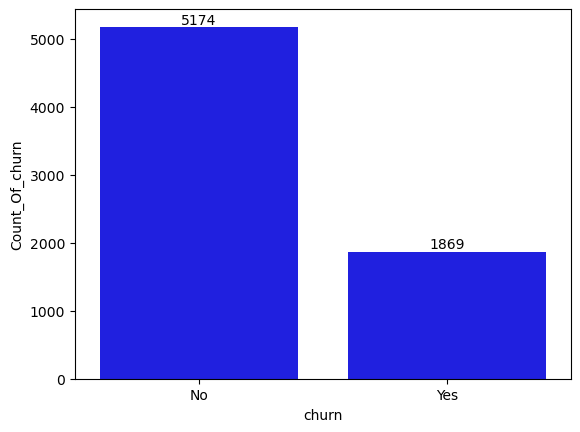

In [15]:
sns.barplot(x=charn_count.index,y=charn_count,color="b")

for index,value in enumerate(charn_count):
    plt.text(index,value,f"{value}",ha='center',va='bottom',color='black')

plt.ylabel("Count_Of_churn")
plt.xlabel("churn")


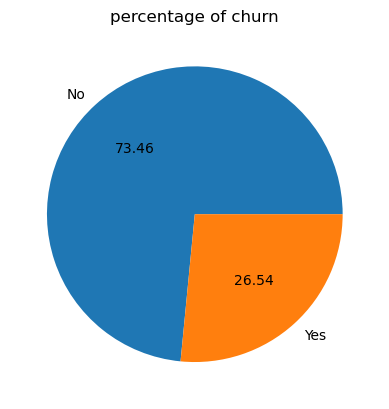

In [16]:
gb=cust.groupby('Churn').agg({'Churn':'count'})
gb
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f")
plt.title("percentage of churn")
plt.show()


In [17]:
# second method of create pie chart

Text(0.5, 1.0, 'churn distribution')

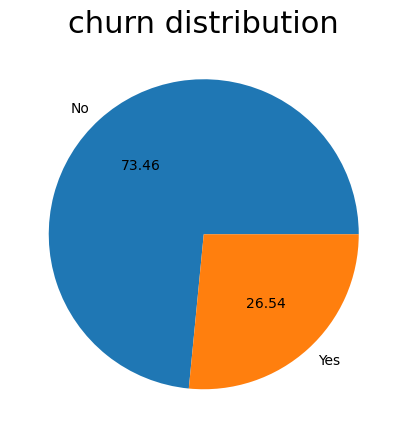

In [18]:
plt.figure(figsize=(5,6))
c=cust["Churn"].value_counts()
plt.pie(c.values,labels=c.index,autopct="%1.2F")
plt.title("churn distribution",fontsize=22)

from this pie chart we can conclude that 26.54% our customer have churned out.
Now let see behind the reason

In [20]:
gender=cust['gender'].value_counts()

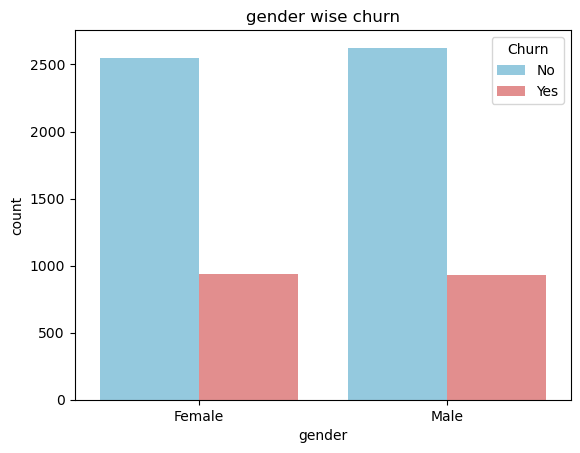

In [21]:
sns.countplot(x='gender',hue='Churn',data=cust,palette=['skyblue', 'lightcoral'])
plt.title("gender wise churn")
plt.show()

In [22]:
senior=cust["SeniorCitizen"].value_counts()
senior

SeniorCitizen
no     5901
yes    1142
Name: count, dtype: int64

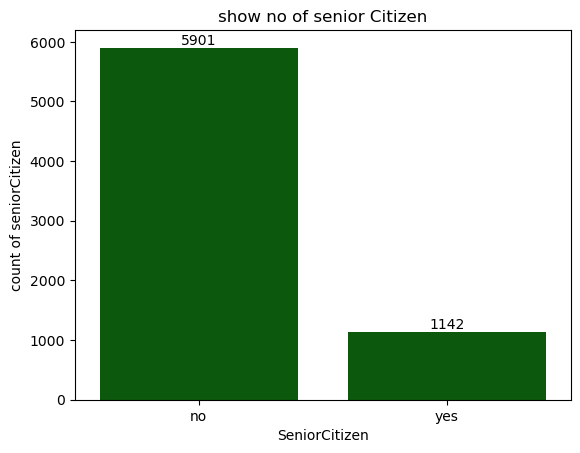

In [23]:
sns.barplot(x=senior.index,y=senior.values,color='darkgreen')

for index,value in enumerate(senior):
    plt.text(index,value,f"{value}",ha='center',va='bottom')

plt.ylabel("count of seniorCitizen")
plt.title("show no of senior Citizen")
plt.show()

[Text(0, 0, '4508'), Text(0, 0, '666')]

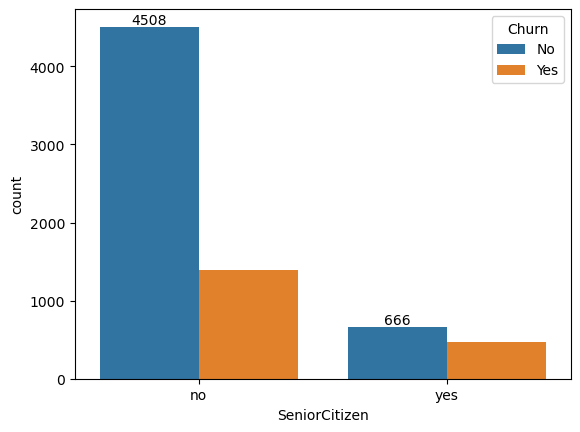

In [24]:
ax=sns.countplot(x='SeniorCitizen',hue='Churn',data=cust)
ax.bar_label(ax.containers[0])

In [25]:
senior_churn = cust.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()*100

senior_churn=round(senior_churn,2)
senior_churn


Churn,No,Yes
SeniorCitizen,,
no,76.39,23.61
yes,58.32,41.68


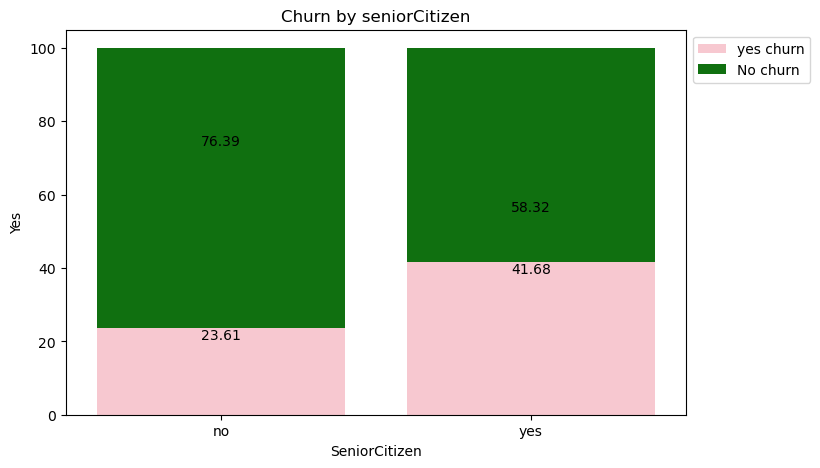

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x=senior_churn.index, y=senior_churn['Yes'],color='Pink',label='yes churn')
sns.barplot(x=senior_churn.index, y=senior_churn['No'],bottom=senior_churn['Yes'], color='Green',label="No churn")

for index,(no_value,yes_value) in enumerate(zip(senior_churn['No'],senior_churn['Yes'])):

    plt.text(index,yes_value,f"{yes_value}",ha='center',va='top')
    plt.text(index,no_value,f"{no_value}",ha='center',va='top')
plt.legend(bbox_to_anchor=(1,1))
plt.title("Churn by seniorCitizen")
                           
plt.show()

 From above this chart we can say that greater seniorCitizen amount of people have churned out

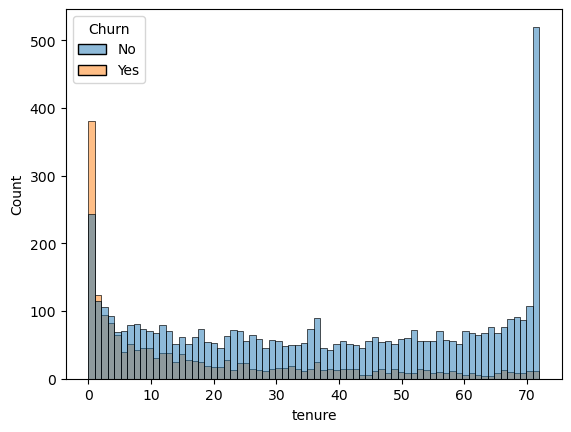

In [28]:
sns.histplot(x='tenure',data=cust,bins=70,hue='Churn')
plt.show()

people who have used our sevices for a long time have stay and people who have used our servicee for 1 or 2 month have churned out

In [30]:

contract=cust['Contract'].value_counts()
contract


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

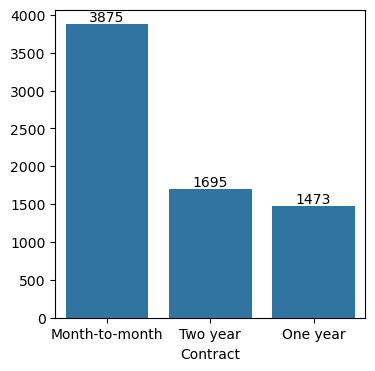

In [31]:
plt.figure(figsize=(4,4))
sns.barplot(x=contract.index, y=contract.values)

for index,value in enumerate(contract):
    plt.text(index,value,f"{value}",ha='center',va='bottom')

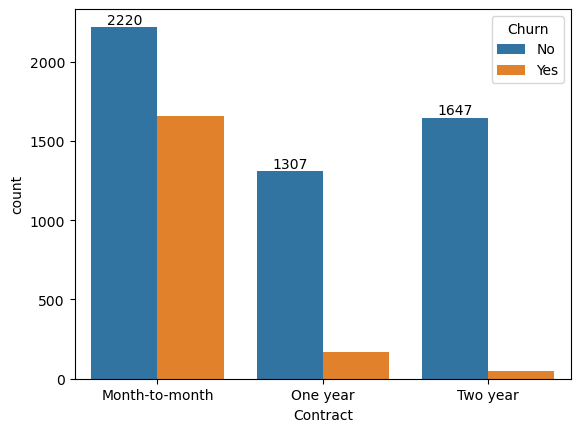

In [32]:
ax=sns.countplot(x='Contract', data=cust, hue='Churn')
ax.bar_label(ax.containers[0])
plt.show()

those people who have month to month contract are churned out and those who have one year or above who have not churned out

In [34]:
cust.columns.tolist()


['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [35]:
PhoneService=cust['PhoneService'].value_counts()
PhoneService

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Text(0.5, 1.0, 'churn wise PhoneService')

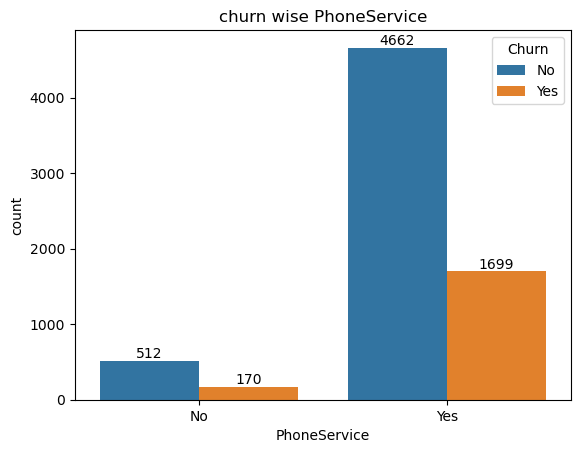

In [36]:
ax=sns.countplot(x='PhoneService', data=cust,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("churn wise PhoneService")

In [37]:
MultipleLines=cust["MultipleLines"].value_counts(normalize=True)*100
MultipleLines=round(MultipleLines,2)
MultipleLines

MultipleLines
No                  48.13
Yes                 42.18
No phone service     9.68
Name: proportion, dtype: float64

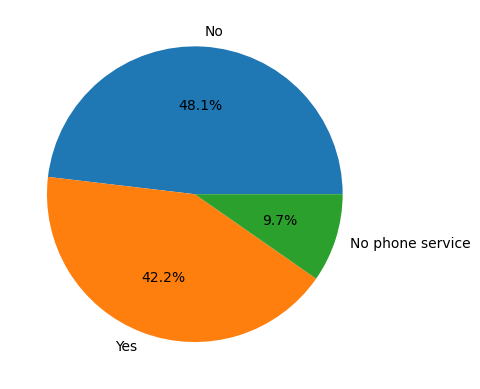

In [38]:

plt.pie(x=MultipleLines.values,data=cust,autopct="%1.1f%%",labels=MultipleLines.index)


plt.show()









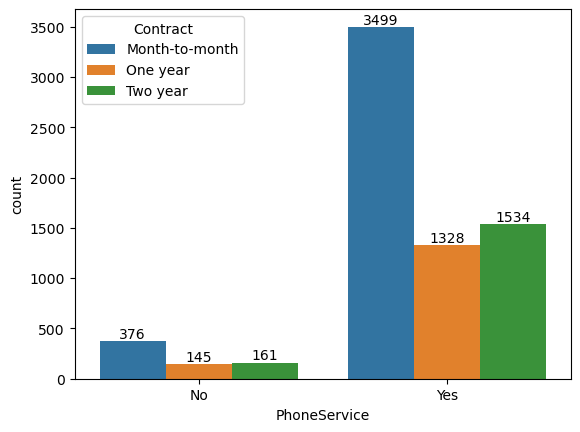

In [132]:
ax=sns.countplot(x='PhoneService',hue='Contract', data=cust)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()

In [88]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [96]:
multi=cust['MultipleLines'].value_counts()

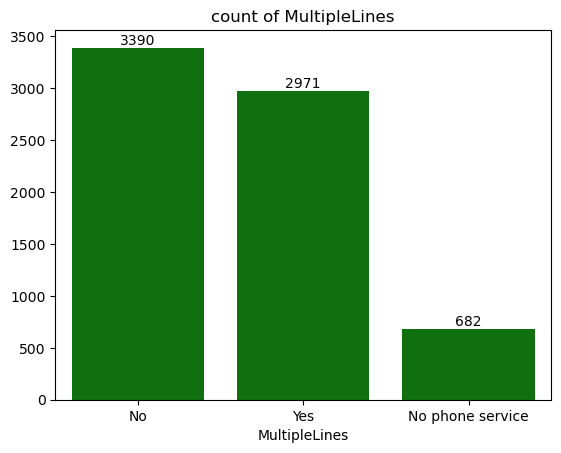

In [114]:
ax=sns.barplot(x=multi.index,y=multi.values,color='green')
ax.bar_label(ax.containers[0])
plt.title("count of MultipleLines")
plt.show()

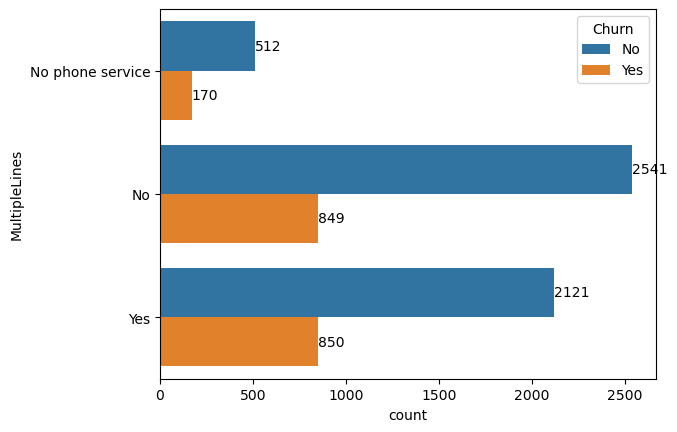

In [126]:
ax=sns.countplot(y='MultipleLines',data=cust,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

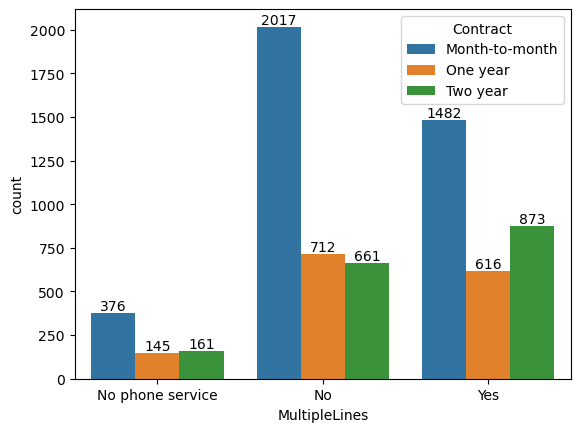

In [156]:
ax=sns.countplot(x='MultipleLines',hue='Contract',data=cust)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()

from above two chart we can conclude that most of the people have multilines and this type of people have month to month subription have churned out

In [172]:
internet=cust['InternetService'].value_counts()

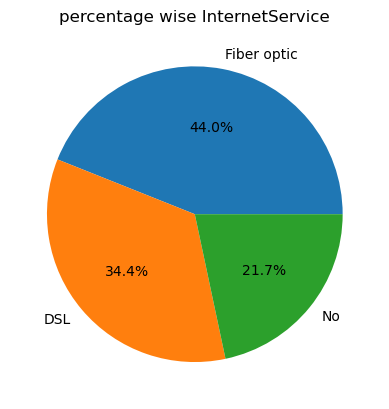

In [184]:
plt.pie(x=internet.values,autopct="%1.1f%%", labels=internet.index)
plt.title("percentage wise InternetService")
plt.show()

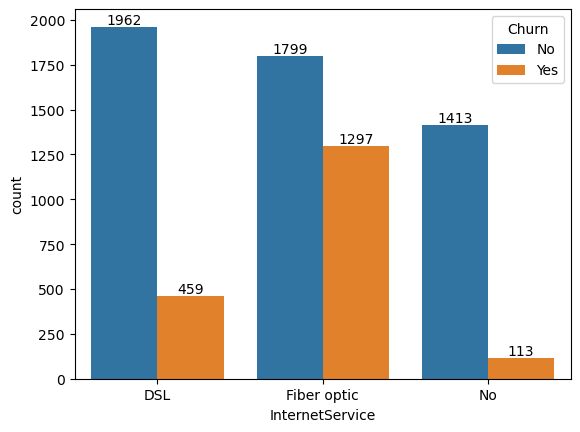

In [200]:
ax=sns.countplot(x='InternetService',data=cust,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

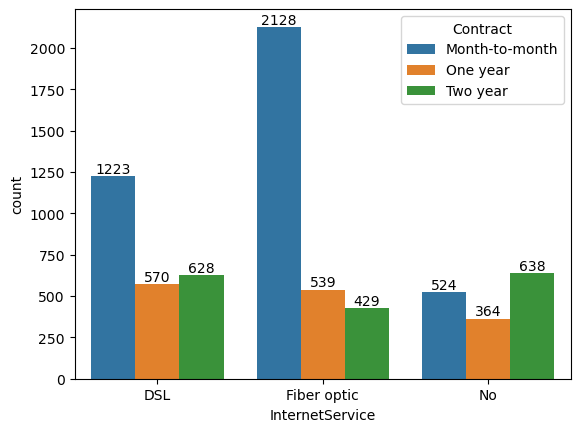

In [314]:
ax=sns.countplot(x='InternetService',data=cust,hue='Contract')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()

above this chart we can see that fiber optic and dsl more churned out and they have month to month subscription

In [320]:
l=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

list(enumerate(l))


[(0, 'OnlineSecurity'),
 (1, 'OnlineBackup'),
 (2, 'DeviceProtection'),
 (3, 'TechSupport'),
 (4, 'StreamingTV'),
 (5, 'StreamingMovies')]

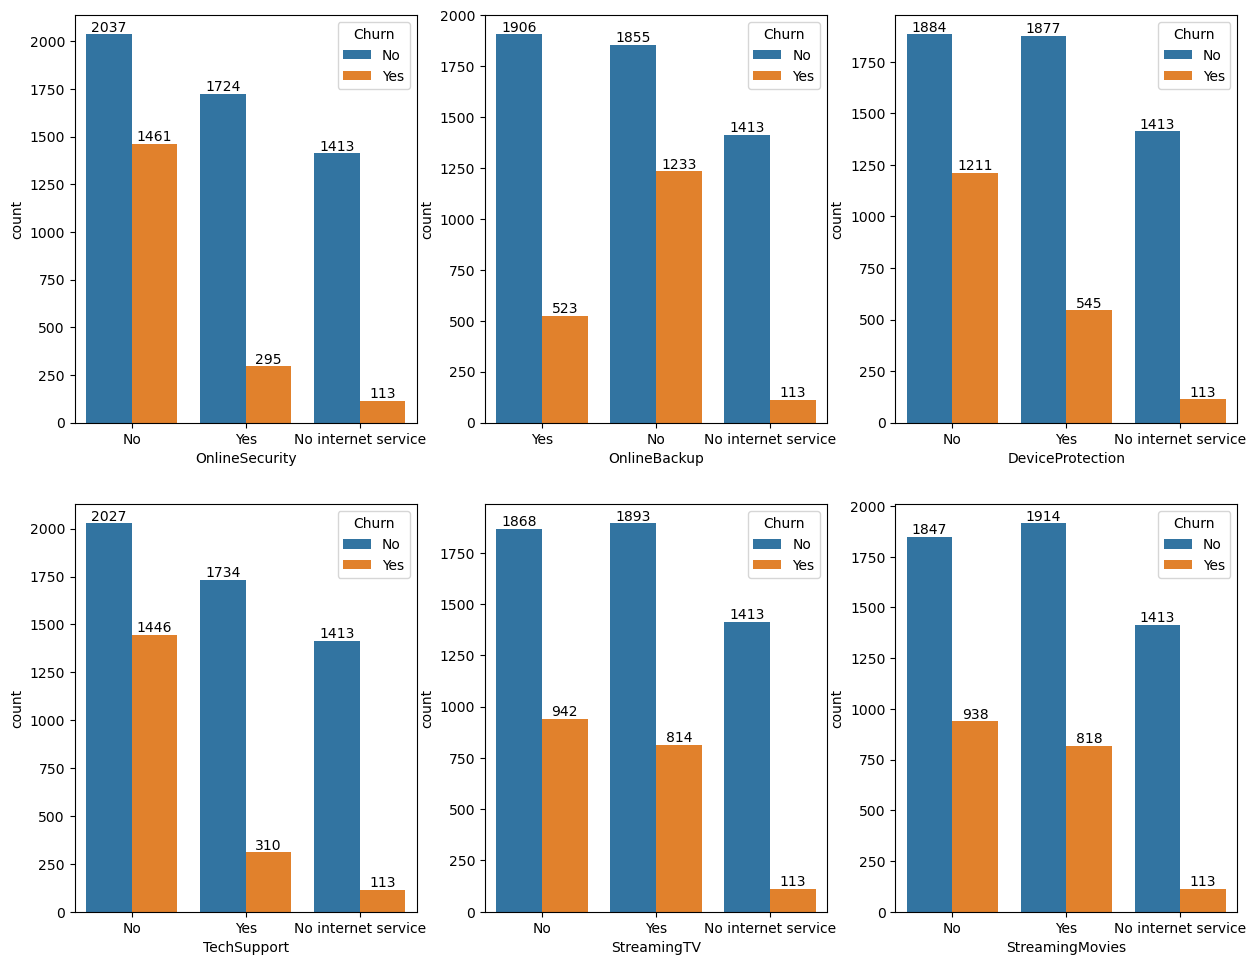

In [388]:
plt.figure(figsize=(15,18))
for i,value in enumerate(l):
    plt.subplot(3,3,i+1)
    ax=sns.countplot(x=value, hue="Churn", data=cust)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
  
    
    

 Customers without security-related services (OnlineSecurity, TechSupport, etc.) tend to churn more.
 Customers with streaming services (StreamingTV & StreamingMovies) have lower churn rates, but a notable number still leave.
 Providing value-added services like security and tech support may help retain customers.
 

In [326]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

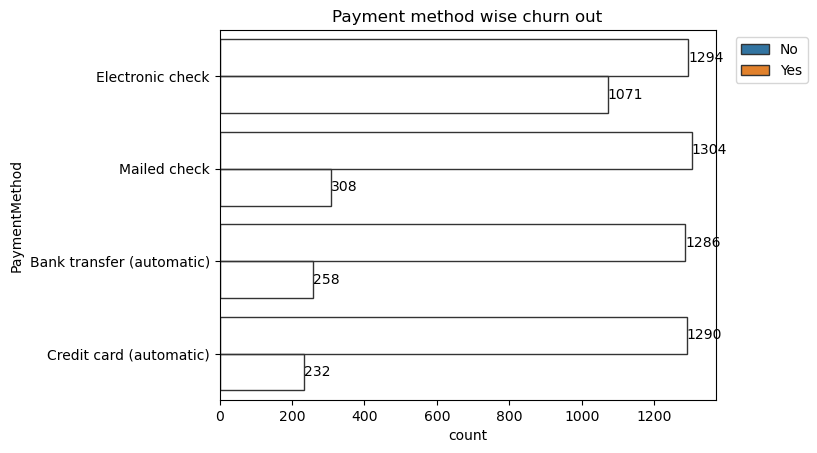

In [384]:
ax=sns.countplot(y='PaymentMethod',data=cust,hue='Churn',facecolor=[1,1,1,0],edgecolor="0.2")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(bbox_to_anchor=(1.2,1)) 
plt.title('Payment method wise churn out')
plt.show()

Electronic check users have the highest churn rate, indicating dissatisfaction or payment-related issues.
Automatic payment methods (Credit Card & Bank Transfer) have significantly lower churn rates, suggesting that auto-payments improve retention.
customers to switch to automatic payment methods (offering discounts) may help reduce churn.



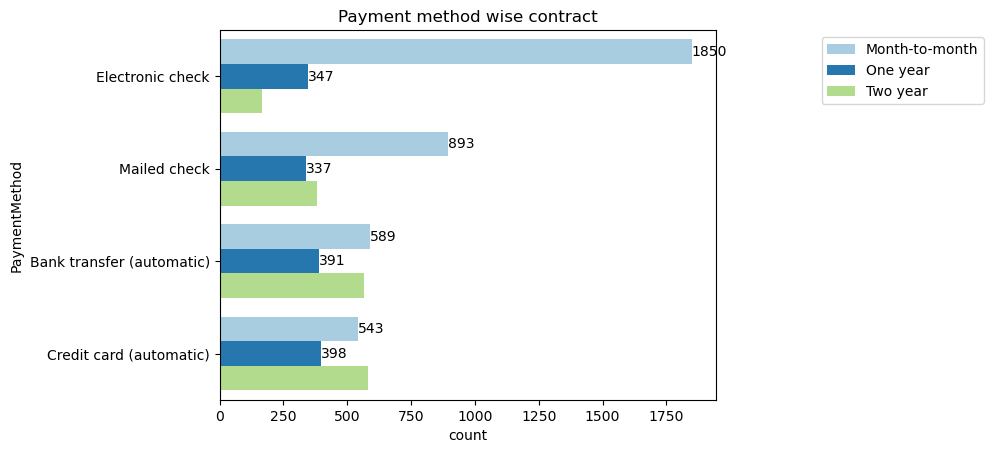

In [362]:
ax=sns.countplot(y='PaymentMethod',data=cust,hue='Contract',palette="Paired",saturation=0.9)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(bbox_to_anchor=(1.2,1))
plt.title("Payment method wise contract")
plt.show()

Most customers using "Electronic Check" are on month-to-month contracts, which are more prone to churn.
Customers on longer contracts (1-year or 2-year) are more likely to use automatic payment methods (Credit Card, Bank Transfer),indicating higher stability and retention.

Customers using electronic checks churn more. Offer discounts or rewards for switching to credit card or bank transfer.
Many churned customers lack Online Security, Tech Support, and Backup services. Offer bundled plans or trials to show the value of these features.


In [390]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [424]:
val=cust.groupby('Contract')["TotalCharges"].sum()
val

Contract
Month-to-month    5305861.5
One year          4467053.5
Two year          6283253.7
Name: TotalCharges, dtype: float64